In [47]:
%pylab inline
from numpy.lib.recfunctions import *

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
segments = genfromtxt("segments.csv", delimiter=',', names=True)
names = genfromtxt("names.csv", delimiter=',', names=True)
callsigns = genfromtxt("callsigns.csv", delimiter=',', names=True)
imos = genfromtxt("imos.csv", delimiter=',', names=True)

d = join_by('mmsi', segments, names, jointype='outer', asrecarray=True)
d = join_by('mmsi', d, imos, jointype='outer', asrecarray=True)
d = join_by('mmsi', d, callsigns, jointype='outer', asrecarray=True)

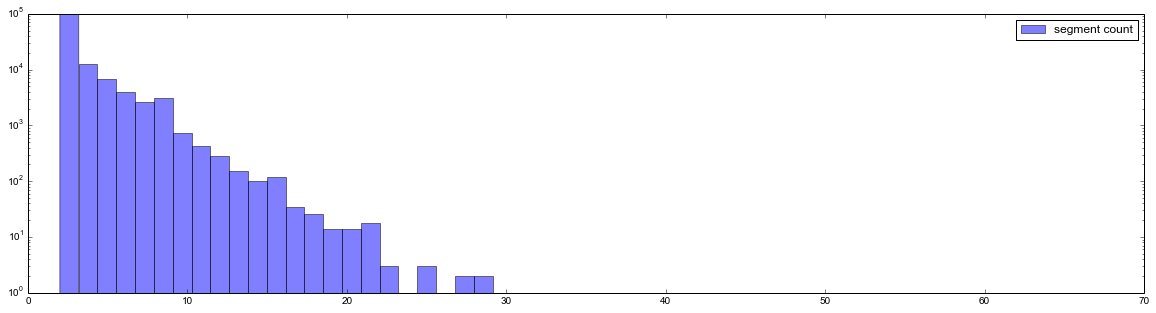

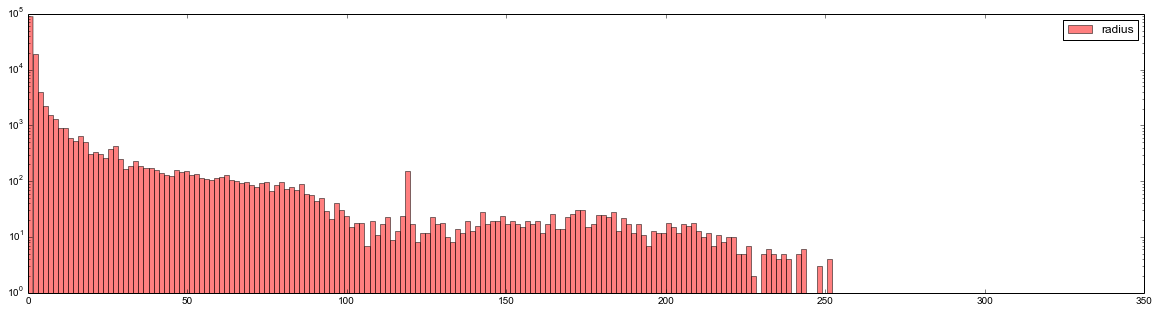

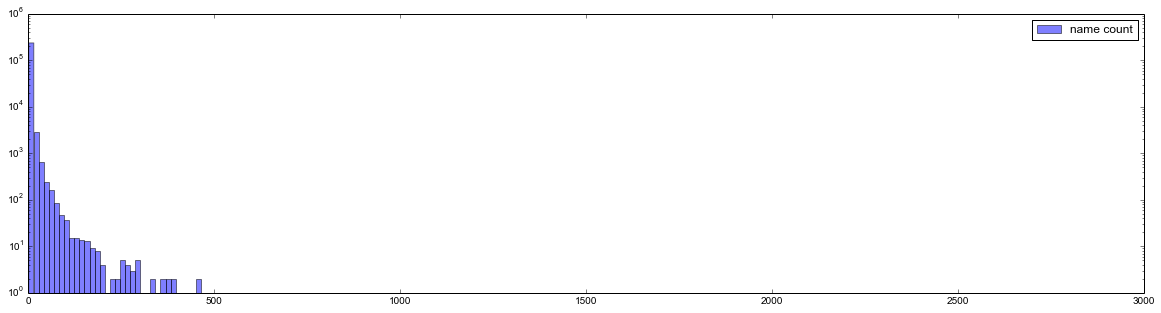

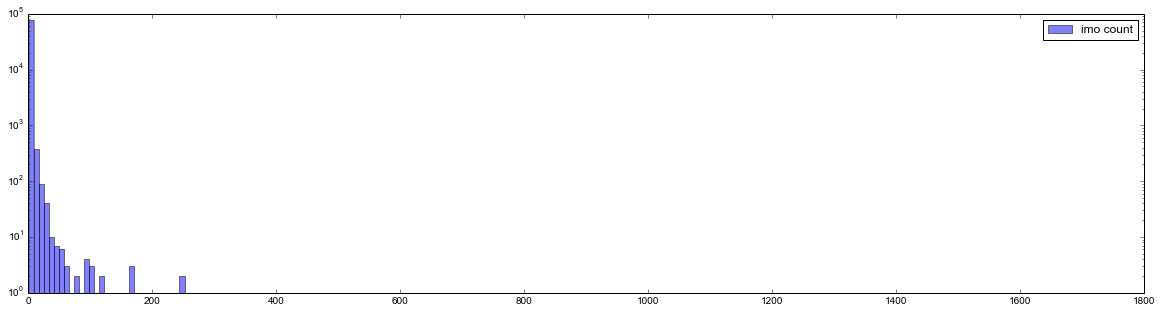

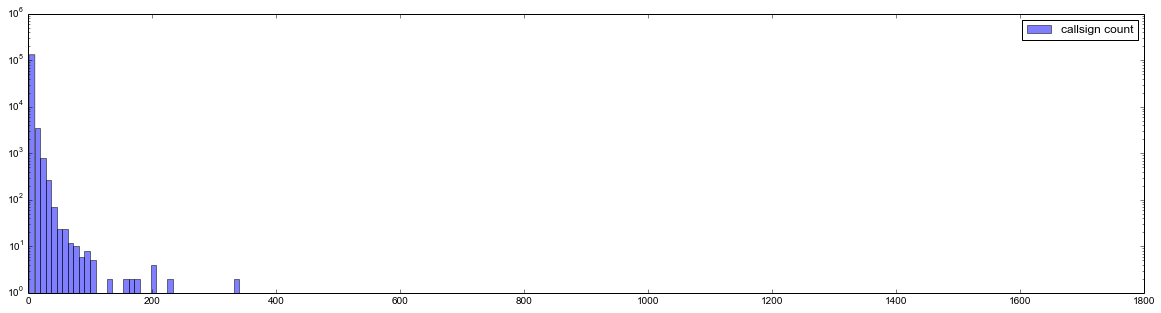

In [34]:
histfig = figure(figsize=(20,5))
hist(segments['seg_count'], bins=50, normed=False, color='b', alpha=0.5, log=True, label="segment count")
legend(); show()

histfig = figure(figsize=(20,5))
r = segments['radius']
r = r[isnan(r) != True]
hist(r, bins=200, normed=False, color='r', alpha=0.5, log=True, label="radius")
legend(); show()

histfig = figure(figsize=(20,5))
hist(names['name_count'], bins=200, normed=False, color='b', alpha=0.5, log=True, label="name count")
legend(); show()

histfig = figure(figsize=(20,5))
hist(imos['imo_count'], bins=200, normed=False, color='b', alpha=0.5, log=True, label="imo count")
legend(); show()

histfig = figure(figsize=(20,5))
hist(callsigns['callsign_count'], bins=200, normed=False, color='b', alpha=0.5, log=True, label="callsign count")
legend(); show()


In [84]:
def compare(col1, col2):
    col1_coord = unique(d[col1].filled())
    col1_coord.sort()
    col2_coord = unique(d[col2].filled())
    col2_coord.sort()
    
    all_counts = zeros((col1_coord.shape[0], col2_coord.shape[0]))
    for i1, c1 in enumerate(col1_coord):
        for i2, c2 in enumerate(col2_coord):
            v = d[d[col1] > c1]
            v = v[v[col2] > c2]
            all_counts[i1,i2] = v.shape[0]

    return col1_coord, col2_coord, all_counts

def plot_uneven_pixels(coord1, coord2, pixels, *arg, **kw):
    pixels = pixels.reshape(pixels.shape[0] * pixels.shape[1])
    coord2, coord1 = meshgrid(coord2, coord1)
    coord1 = coord1.reshape(coord1.shape[0] * coord1.shape[1])
    coord2 = coord2.reshape(coord2.shape[0] * coord2.shape[1])
    scatter(coord1, coord2, c=pixels/max(pixels), *arg, **kw)

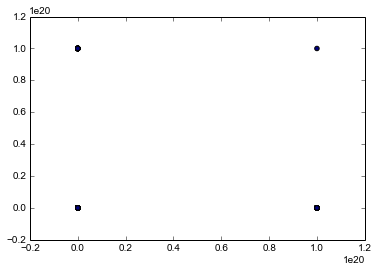

In [85]:
plot_uneven_pixels(*compare('seg_count', 'name_count'), marker='o')

In [52]:
segment_count = linspace(0, 70, 100)
name_count = linspace(0, 500, 100)

all_counts = zeros((segment_count.shape[0], name_count.shape[0]))
for si, sc in enumerate(segment_count):
    for ni, nc in enumerate(name_count):
        v = d[d['seg_count'] > sc]
        v = v[v['name_count'] > nc]
        all_counts[si,ni] = v.shape[0]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in log


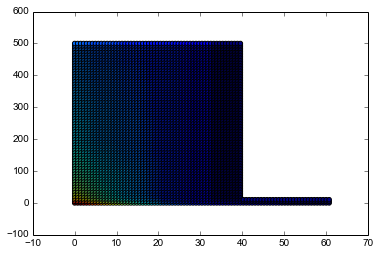

In [68]:
counts = all_counts[:100,:100]
segment_count = linspace(0, 70, 100)[:100]
name_count = linspace(0, 500, 100)[:100]

counts = counts.reshape(counts.shape[0] * counts.shape[1])
name_count, segment_count = meshgrid(name_count, segment_count)
segment_count = segment_count.reshape(segment_count.shape[0] * segment_count.shape[1])
name_count = name_count.reshape(name_count.shape[0] * name_count.shape[1])

scatter(segment_count, name_count, c=log(counts)/log(amax(all_counts)), marker="o")

In [59]:
all_counts.shape

(100, 100)

In [81]:
sc = unique(d['imo_count'].filled())
sc.sort()
sc.shape

(81,)

In [74]:
sc

array([  2.00000000e+00,   2.00000000e+00,   2.00000000e+00, ...,
         1.00000000e+20,   1.00000000e+20,   1.00000000e+20])